<a href="https://colab.research.google.com/github/InowaR/colab/blob/main/rnn_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [37]:
# Генерация синтетических данных
np.random.seed(0)
data = np.random.normal(20, 2, 100)  # 100 дней с температурой около 20 градусов

# Преобразуем данные в DataFrame
df = pd.DataFrame(data, columns=['Temperature'])

# Нормализация данных
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df)

# Функция для создания последовательностей
def create_dataset(data, time_step=1):
    X, Y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        Y.append(data[i + time_step, 0])
    return np.array(X), np.array(Y)

# Параметры
time_step = 10
X, y = create_dataset(scaled_data, time_step)

# Изменение формы данных для LSTM [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

In [38]:
# Создание модели LSTM
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(1))

# Компиляция модели
model.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [39]:
model.fit(X, y, epochs=10, batch_size=16,verbose=1)

Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.2826
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0949
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0563
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0381
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0439
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0519
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0450
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0421
Epoch 9/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0367
Epoch 10/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0424


In [40]:
# Прогнозирование
last_10_days = scaled_data[-time_step:].reshape(1, time_step, 1)
predicted_temperature = model.predict(last_10_days)
predicted_temperature = scaler.inverse_transform(predicted_temperature)

print(f"Прогнозируемая температура на следующий день: {predicted_temperature[0][0]:.2f}°C")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step
Прогнозируемая температура на следующий день: 20.65°C


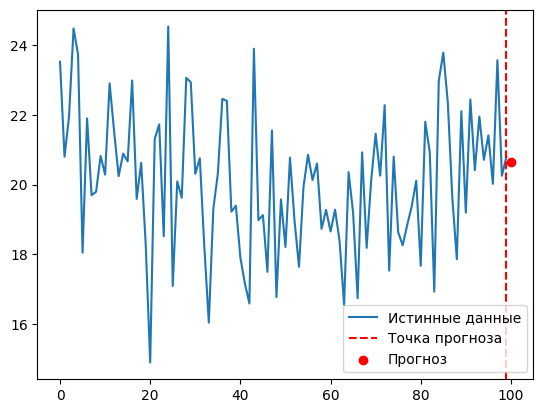

In [41]:
# Визуализация результатов
plt.plot(df['Temperature'], label='Истинные данные')
plt.axvline(x=len(df)-1, color='r', linestyle='--', label='Точка прогноза')
plt.scatter(len(df), predicted_temperature[0][0], color='red', label='Прогноз')
plt.legend()
plt.show()